In [1]:
import pandas as pd
import datetime
import calendar
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np

In [66]:
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

In [4]:
master_df = train_df.merge(stores_df, on='Store', how='left')
master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

In [5]:
master_df['MarkDown1'] = master_df['MarkDown1'].fillna(0)
master_df['MarkDown2'] = master_df['MarkDown2'].fillna(0)
master_df['MarkDown3'] = master_df['MarkDown3'].fillna(0)
master_df['MarkDown4'] = master_df['MarkDown4'].fillna(0)
master_df['MarkDown5'] = master_df['MarkDown5'].fillna(0)
master_df['isHoliday'] = master_df['IsHoliday_x']
master_df = master_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])
master_df['Date'] = pd.to_datetime(master_df['Date'], format='%Y-%m-%d')
master_df['Week_Number'] = master_df['Date'].dt.week
master_df['Quarter'] = master_df['Date'].dt.quarter
master_df['Month'] = master_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
master_df['Season'] = (master_df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)

In [6]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Week_Number,Quarter,Month,Season
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,1,Feb,Winter
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,6,1,Feb,Winter
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,7,1,Feb,Winter
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,8,1,Feb,Winter
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,9,1,Mar,Winter


In [7]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Week_Number,Quarter,Month,Season
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,1,Feb,Winter
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,6,1,Feb,Winter
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,7,1,Feb,Winter
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,8,1,Feb,Winter
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,9,1,Mar,Winter


In [8]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.315
Date:                Wed, 18 Jul 2018   Prob (F-statistic):            0.00786
Time:                        19:55:24   Log-Likelihood:            -1.2106e+05
No. Observations:               10238   AIC:                         2.421e+05
Df Residuals:                   10226   BIC:                         2.422e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.084e-06   2.95e-0

In [9]:
master_df.describe()
#master_df.to_csv("master.csv")

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week_Number,Quarter
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,25.826762,2.482767
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,14.151887,1.071341
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,14.000000,2.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,26.000000,2.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,38.000000,3.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,52.000000,4.000000


In [10]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 3)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 4)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 5)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.290
Date:                Wed, 18 Jul 2018   Prob (F-statistic):              0.223
Time:                        19:55:25   Log-Likelihood:            -1.1933e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10232   BIC:                         2.388e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.766e-07    2.2e-0

In [11]:
master_df[(master_df['Store'] == 1) & (master_df['Quarter'] == 1)].describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week_Number,Quarter
count,2376.0,2376.000000,2376.000000,2376.0,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.0
mean,1.0,44.225589,21502.405274,151315.0,52.258258,3.157235,3966.692420,1961.729949,17.343779,2544.977243,1900.700013,215.531776,7.676141,7.185185,1.0
std,0.0,29.741929,27384.514596,0.0,9.174786,0.388876,7067.545476,4495.325962,39.701227,7051.589770,2788.900007,4.143648,0.298330,3.417264,0.0
min,1.0,1.000000,-863.000000,151315.0,35.400000,2.514000,0.000000,0.000000,0.000000,0.000000,0.000000,211.018042,7.348000,1.000000,1.0
25%,1.0,19.750000,3447.550000,151315.0,45.320000,2.976000,0.000000,0.000000,0.000000,0.000000,0.000000,211.404742,7.348000,5.000000,1.0
50%,1.0,37.500000,10889.605000,151315.0,53.560000,3.157000,0.000000,0.000000,0.000000,0.000000,0.000000,213.823333,7.742000,7.000000,1.0
75%,1.0,72.000000,30289.552500,151315.0,58.760000,3.473000,6118.560000,1082.740000,9.800000,671.430000,3402.660000,220.172015,7.742000,10.000000,1.0
max,1.0,99.000000,158241.980000,151315.0,69.970000,3.845000,34577.060000,21813.160000,160.530000,32403.870000,8483.000000,221.361012,8.106000,13.000000,1.0


In [12]:
week_array = []
store_array = []

for i in range(1, 46):
    store_array.append(i)
total_stores_sales = {}

for i in range(1, 46):
    week_array.append(i)
    current_store_array = []
    for j in range(1, 53):
        current_dp = master_df[(master_df['Store'] == i) & (master_df['Week_Number'] == j)]
        sales_array = current_dp['Weekly_Sales'].tolist()
        sum_sales = 0
        for k in range(1, len(sales_array)):
            sum_sales = sum_sales + sales_array[k]
        current_store_array.append(sum_sales)
    total_stores_sales[i] = current_store_array

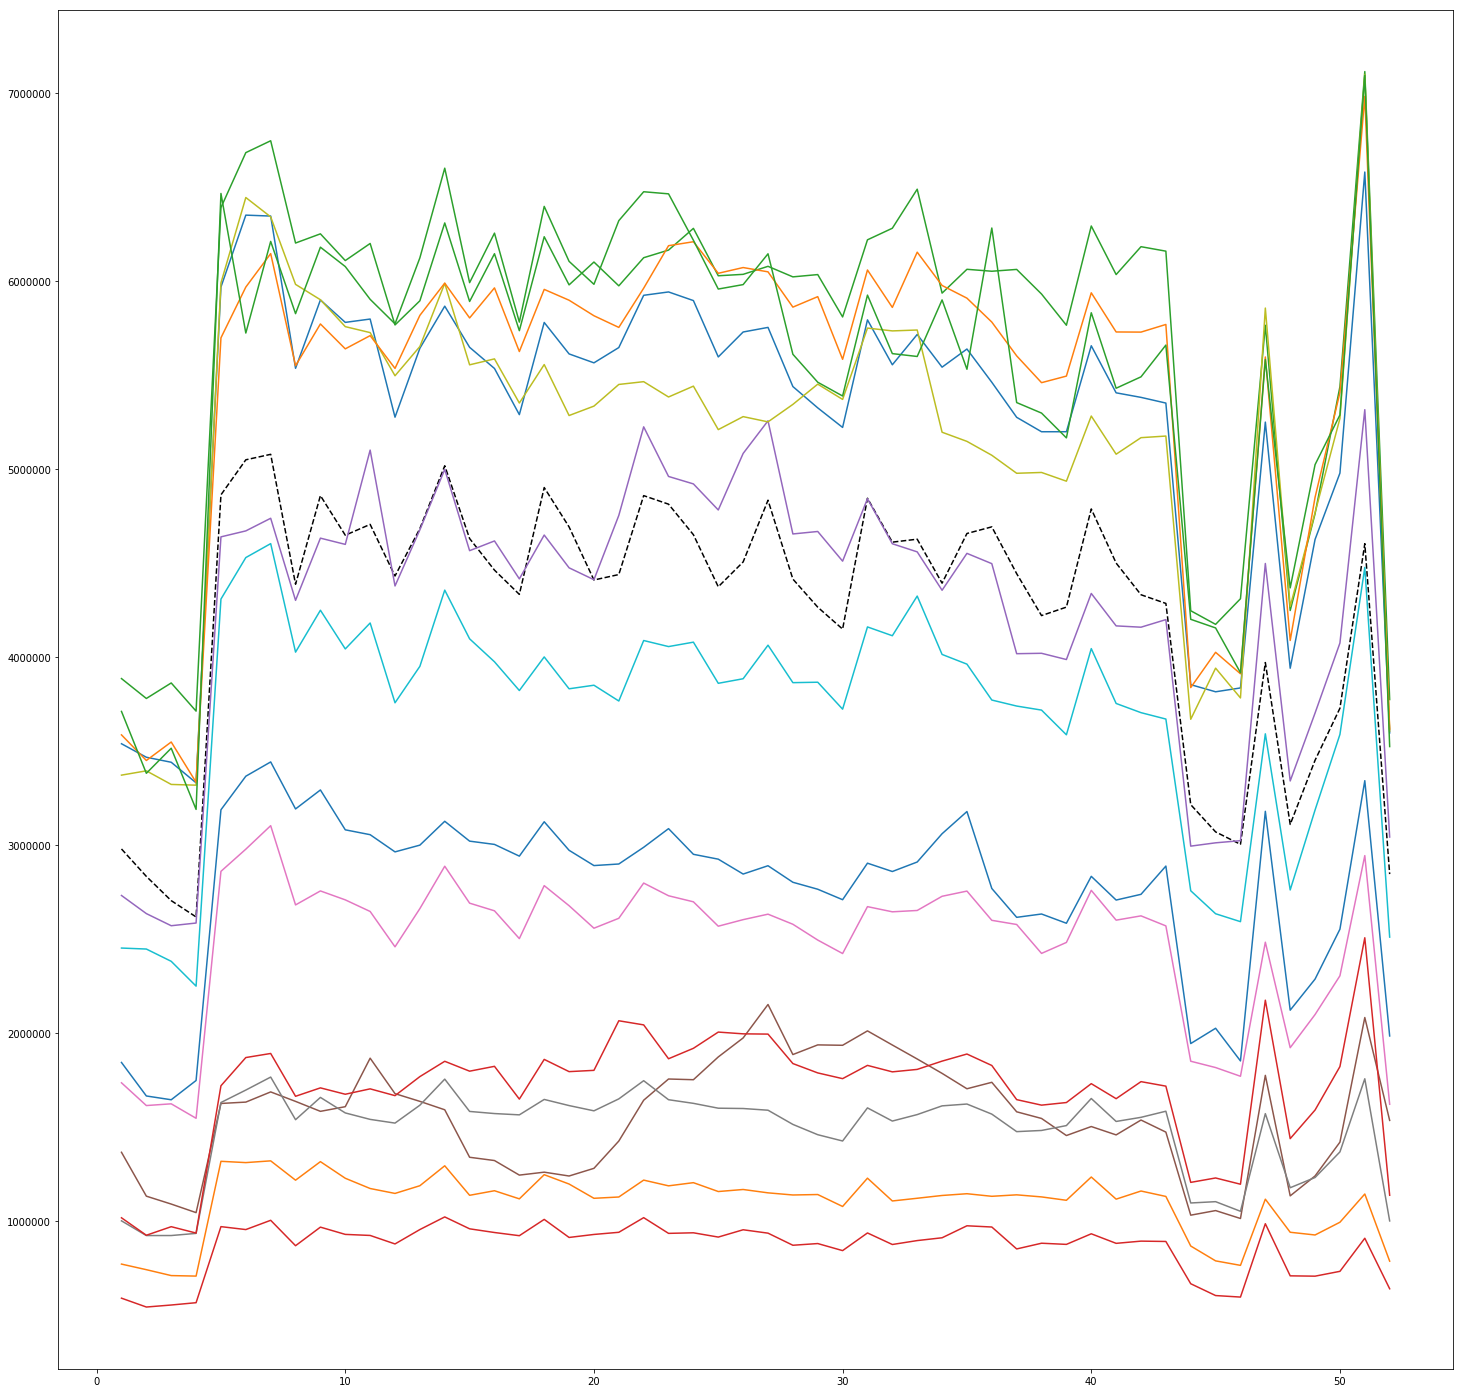

In [13]:
store_array = []
for i in range(1, 53):
    store_array.append(i)

#for i in range(1, 46):
    #total_stores_sales[i].pop(0)
    
plt.plot(store_array,total_stores_sales[1],"k--")
plt.plot(store_array,total_stores_sales[2])
plt.plot(store_array,total_stores_sales[3])
plt.plot(store_array,total_stores_sales[4])
plt.plot(store_array,total_stores_sales[5])
plt.plot(store_array,total_stores_sales[6])
plt.plot(store_array,total_stores_sales[7])
plt.plot(store_array,total_stores_sales[8])
plt.plot(store_array,total_stores_sales[9])
plt.plot(store_array,total_stores_sales[10])
plt.plot(store_array,total_stores_sales[11])
plt.plot(store_array,total_stores_sales[12])
plt.plot(store_array,total_stores_sales[13])
plt.plot(store_array,total_stores_sales[14])
plt.plot(store_array,total_stores_sales[15])

fig = plt.gcf()
fig.set_size_inches(25,25)
plt.show()

In [14]:
print(total_stores_sales[2][1])

3466759.32


In [15]:
weekly_total_array = []

for i in range(52):
    weekly_sum = 0
    for j in range(1, 46):
        weekly_sum = weekly_sum + total_stores_sales[j][i]
    weekly_total_array.append(weekly_sum)
    
print(weekly_total_array)

[87207935.44000001, 82123863.94999997, 82111755.27, 78782339.45, 141107626.29999998, 144225095.94000003, 146071957.49999994, 133184545.96, 139950456.44, 137229283.09, 135916119.07999998, 130958230.25999998, 136703731.92999998, 145236126.29000002, 136176536.90999997, 137895177.51000002, 130351802.38000001, 141820036.94, 137035191.81000006, 135357540.22, 140299894.08, 146593793.20999998, 144498562.74000004, 142816534.57, 139513219.76, 142414153.89000002, 146374081.85, 137211558.90999997, 135591498.90999994, 131776493.19999999, 143064226.45000002, 139492566.94, 140724032.85999998, 140164518.32999998, 139085059.64999998, 140047934.25, 130392878.93000004, 127720867.82, 127406445.66, 138991766.96, 132671122.41000004, 132877323.61999999, 133241687.89000002, 93093042.81000003, 93961127.03999996, 90883180.69999997, 131682585.43, 98358609.67, 109939927.62, 120117751.87, 155697302.7, 85853804.95]


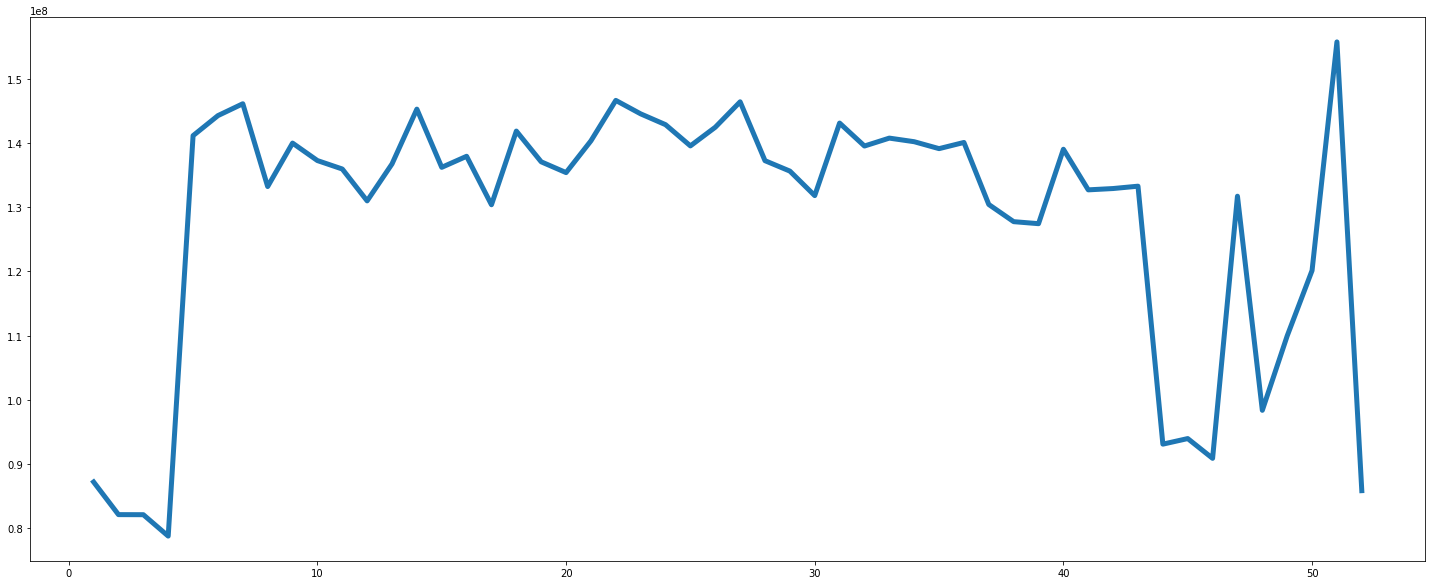

In [16]:
plt.plot(store_array,weekly_total_array, linewidth = 5)
fig = plt.gcf()
fig.set_size_inches(25,10)
plt.show()

In [17]:
sales_dict = {}
for store in range(1, 46):
    for dept in range(1, 100):
        current_key = str(store) + "," + str(dept)
        sales_dict[current_key] = 0

In [18]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1) & (master_df['Dept'] == 1)]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.528
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           8.49e-06
Time:                        19:55:34   Log-Likelihood:                -1494.3
No. Observations:                 143   AIC:                             3013.
Df Residuals:                     131   BIC:                             3048.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -9.032e-07   5.87e-06     -0.154      0.878   -1.25e-05    1.07e-05
isHoliday[T.True]  -144.8330   3236.662     -0.045      0.964   -6547.722    6258.056
Fuel_Price         1821.3247   3268.271      0.557      0.578   -4644.094    8286.743
Temperature        -408.5091     61.686     -6.622      0.000    -530.539    -286.479
Size                 -0.1367      0.888     -0.154      0.878      -1.893       1.620
MarkDown1             0.1410      0.288      0.490      0.625      -0.428       0.710
MarkDown2            -0.2022      0.186     -1.088      0.279      -0.570       0.166
MarkDown3            -0.1604      0.171     -0.937      0.351      -0.499       0.178
MarkDown4             0.0411      0.321      0.128      0.898      -0.594       0.676
MarkDown5            -0.5835      0.366     -1.592      0.114      -1.308       0.142
CPI                 224.0355    555.419      0.403      0.687    -874.716    1322.787
Unemployment       1883.8868   3836.450      0.491      0.624   -5705.526    9473.299
Week_Number         129.3682     60.724      2.130      0.035       9.241     249.495
==============================================================================
Omnibus:                       73.825   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.640
Skew:                           2.014   Prob(JB):                     1.13e-56
Kurtosis:                       8.197   Cond. No.                     7.86e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
#for store in range(1, 46):
#    week_array.append(i)
#    current_store_array = []
#    for dept in range(1, 100):
#        for j in range(1, 53):
#            current_dp = master_df[(master_df['Store'] == store) & (master_df['Dept'] == dept) & (master_df['Week_Number'] == j)]
#            sales_array = current_dp['Weekly_Sales'].tolist()
#            sum_sales = 0
#            for k in range(1, len(sales_array)):
#                sum_sales = sum_sales + sales_array[k]
#            current_key = str(store) + "," + str(dept)
#            sales_dict[current_key] = sum_sales

In [20]:
master_df = master_df.join(pd.get_dummies(master_df['Store'], prefix='Store'))
master_df = master_df.join(pd.get_dummies(master_df['Dept'], prefix='Dept'))
master_df = master_df.join(pd.get_dummies(master_df['Week_Number'], prefix='Week_Number'))

In [21]:
master_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Week_Number_43,Week_Number_44,Week_Number_45,Week_Number_46,Week_Number_47,Week_Number_48,Week_Number_49,Week_Number_50,Week_Number_51,Week_Number_52
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,...,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,...,0.021005,0.013957,0.013979,0.013941,0.014135,0.014097,0.014133,0.014166,0.014192,0.014104
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,...,0.143400,0.117314,0.117402,0.117245,0.118049,0.117892,0.118039,0.118175,0.118283,0.117922
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
store_cols = [col for col in master_df if col.startswith('Store_')]
weeks_cols = [col for col in master_df if col.startswith('Week_Number_')]
dept_cols = [col for col in master_df if col.startswith('Dept_')]

equals_to_str = ""

for i in range(len(store_cols)):
    equals_to_str = equals_to_str + str(store_cols[i]) + " + "
    
for i in range(len(weeks_cols)):
    equals_to_str = equals_to_str + str(weeks_cols[i]) + " + "
    
for i in range(len(dept_cols)):
    equals_to_str = equals_to_str + str(dept_cols[i]) + " + "
    
print(equals_to_str)

Store_1 + Store_2 + Store_3 + Store_4 + Store_5 + Store_6 + Store_7 + Store_8 + Store_9 + Store_10 + Store_11 + Store_12 + Store_13 + Store_14 + Store_15 + Store_16 + Store_17 + Store_18 + Store_19 + Store_20 + Store_21 + Store_22 + Store_23 + Store_24 + Store_25 + Store_26 + Store_27 + Store_28 + Store_29 + Store_30 + Store_31 + Store_32 + Store_33 + Store_34 + Store_35 + Store_36 + Store_37 + Store_38 + Store_39 + Store_40 + Store_41 + Store_42 + Store_43 + Store_44 + Store_45 + Week_Number_1 + Week_Number_2 + Week_Number_3 + Week_Number_4 + Week_Number_5 + Week_Number_6 + Week_Number_7 + Week_Number_8 + Week_Number_9 + Week_Number_10 + Week_Number_11 + Week_Number_12 + Week_Number_13 + Week_Number_14 + Week_Number_15 + Week_Number_16 + Week_Number_17 + Week_Number_18 + Week_Number_19 + Week_Number_20 + Week_Number_21 + Week_Number_22 + Week_Number_23 + Week_Number_24 + Week_Number_25 + Week_Number_26 + Week_Number_27 + Week_Number_28 + Week_Number_29 + Week_Number_30 + Week_Number_3

In [57]:
equals_to_str = "Weekly_Sales ~ " + equals_to_str + "isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment"

In [58]:
result = sm.ols(formula = equals_to_str, data=master_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     4511.
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:17:52   Log-Likelihood:            -4.5974e+06
No. Observations:              421570   AIC:                         9.195e+06
Df Residuals:                  421385   BIC:                         9.197e+06
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3748.6821   1830.79

In [68]:
store_cols = [col for col in master_df if col.startswith('Store_')]

equals_to_str = ""

for i in range(len(store_cols)):
    equals_to_str = equals_to_str + str(store_cols[i]) + " + "
    
equals_to_str = "Weekly_Sales ~ " + equals_to_str + "isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment"

result = sm.ols(formula = equals_to_str, data=master_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     811.9
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:23:10   Log-Likelihood:            -4.8059e+06
No. Observations:              421570   AIC:                         9.612e+06
Df Residuals:                  421515   BIC:                         9.613e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5998.5230   2976.69

In [70]:
predict_array = result.predict()

In [ ]:
for i in range(len(predict_array)):
    print(predict_array[i])

In [ ]:
g = sns.pairplot()